In [1]:
# Import some libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Import Seaborn
import seaborn as sns
# This allows plots to appear on the IPython notebook.
%matplotlib inline

In [2]:
df = pd.read_csv("data/riyadh_route_edges_am.txt", sep=" ", index_col=0)
print df["travel_time"].head(2)
df.head(2)

eid
101      0.268594
20415    1.238560
Name: travel_time, dtype: float64


source  target   volume  capacity       voc  degree  free_travel_time  \
eid                                                                            
101         1       2  67.2220      2850  0.023587     158          0.268594   
20415       1    5748  53.1765      2850  0.018658     108          1.238560   

       travel_time  
eid                 
101       0.268594  
20415     1.238560

*1. [(1, 2), (1, 5748), (1, 9437)]
*2. 3
*3. [1, 2, 3]
*4. [(1, 5748), (1, 9437), (2, 7438), (2, 9950)]
*5. {'capacity': 2850, 'degree': 369, 'voc': 0.073342999999999992, 'volume': 209.02700000000002, 'travel_time': 0.268596, 'free_travel_time': 0.268594}
*6. 0.268596
*6. 0.268596
*7. {}


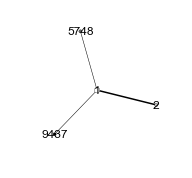

In [3]:
# Let's define an empty undirected graph "RG".
RG = nx.Graph()
# We also define the values dictionary for the "edge attributes"
keys = ['volume', 'capacity', 'voc', 'degree', 'free_travel_time', 'travel_time']
for row in df.itertuples(index=False):    
    values = row[2:]    
    # We create a dictionary "edge_attributes" with the keys and row values
    edge_attributes = dict(zip(keys, values))    
    my_tuple = (row[0], row[1])   
    # We add the edge to the graph use "add_edge" function
    RG.add_edge(*my_tuple, attr_dict=edge_attributes)

print "*1. "+str(RG.edges(1)) # print all edges with starting point "1"

# How to call nodes, edges, and their attributes
print "*3. "+str(RG.nodes()[:3]) # print first 
print "*4. "+str(RG.edges()[1:5])
print "*5. "+str(RG[1][2])
print "*6. "+str(RG[1][2]["travel_time"])
print "*6. "+str(RG[2][1]["travel_time"])
print "*7. "+str(RG.node[1])

G = nx.Graph()
G.add_edges_from(RG.edges(1))
degrees_G = nx.degree(G)
node_sizes = [v*10 for v in degrees_G.values()]
node_colors = range(len(G.nodes()))
weight = [w*0.05 for w in node_sizes]

plt.figure(figsize=(2,2))
P = nx.spring_layout(G);
nx.draw(G, pos=P, node_size=node_sizes,width=weight,node_color=node_colors)
nx.draw_networkx_labels(G,pos=P); # semicolon suppresses output

In [46]:
nodes_df = pd.read_csv("data/riyadh_nodes.txt", sep=" ", index_col=0)
nodes_df.head(2)

loc_dict = {}
for node_index in RG.nodes():
    loc_dict[node_index] = (float(nodes_df.loc[[node_index]]['st_x']), float(nodes_df.loc[[node_index]]['st_y']))
    RG.node[node_index]["coordinate"] = (nodes_df['st_x'][node_index], nodes_df['st_y'][node_index])

print "Done with the process"

Done with the process


In [47]:
print RG.node[1]["coordinate"]
print RG.node[1]
print "\n"

# Analysis the degrees, and centrality use "nx.degree()" and "nx.degree_centrality" function        
degrees = nx.degree(RG)
centralities= nx.degree_centrality(RG)
node_centrality=[round((centralities[u]*10000),2) for u in centralities]
#print degrees
#print "\n"
#print node_centrality

(46.849302248324101, 24.701475446932697)
{'coordinate': (46.849302248324101, 24.701475446932697)}




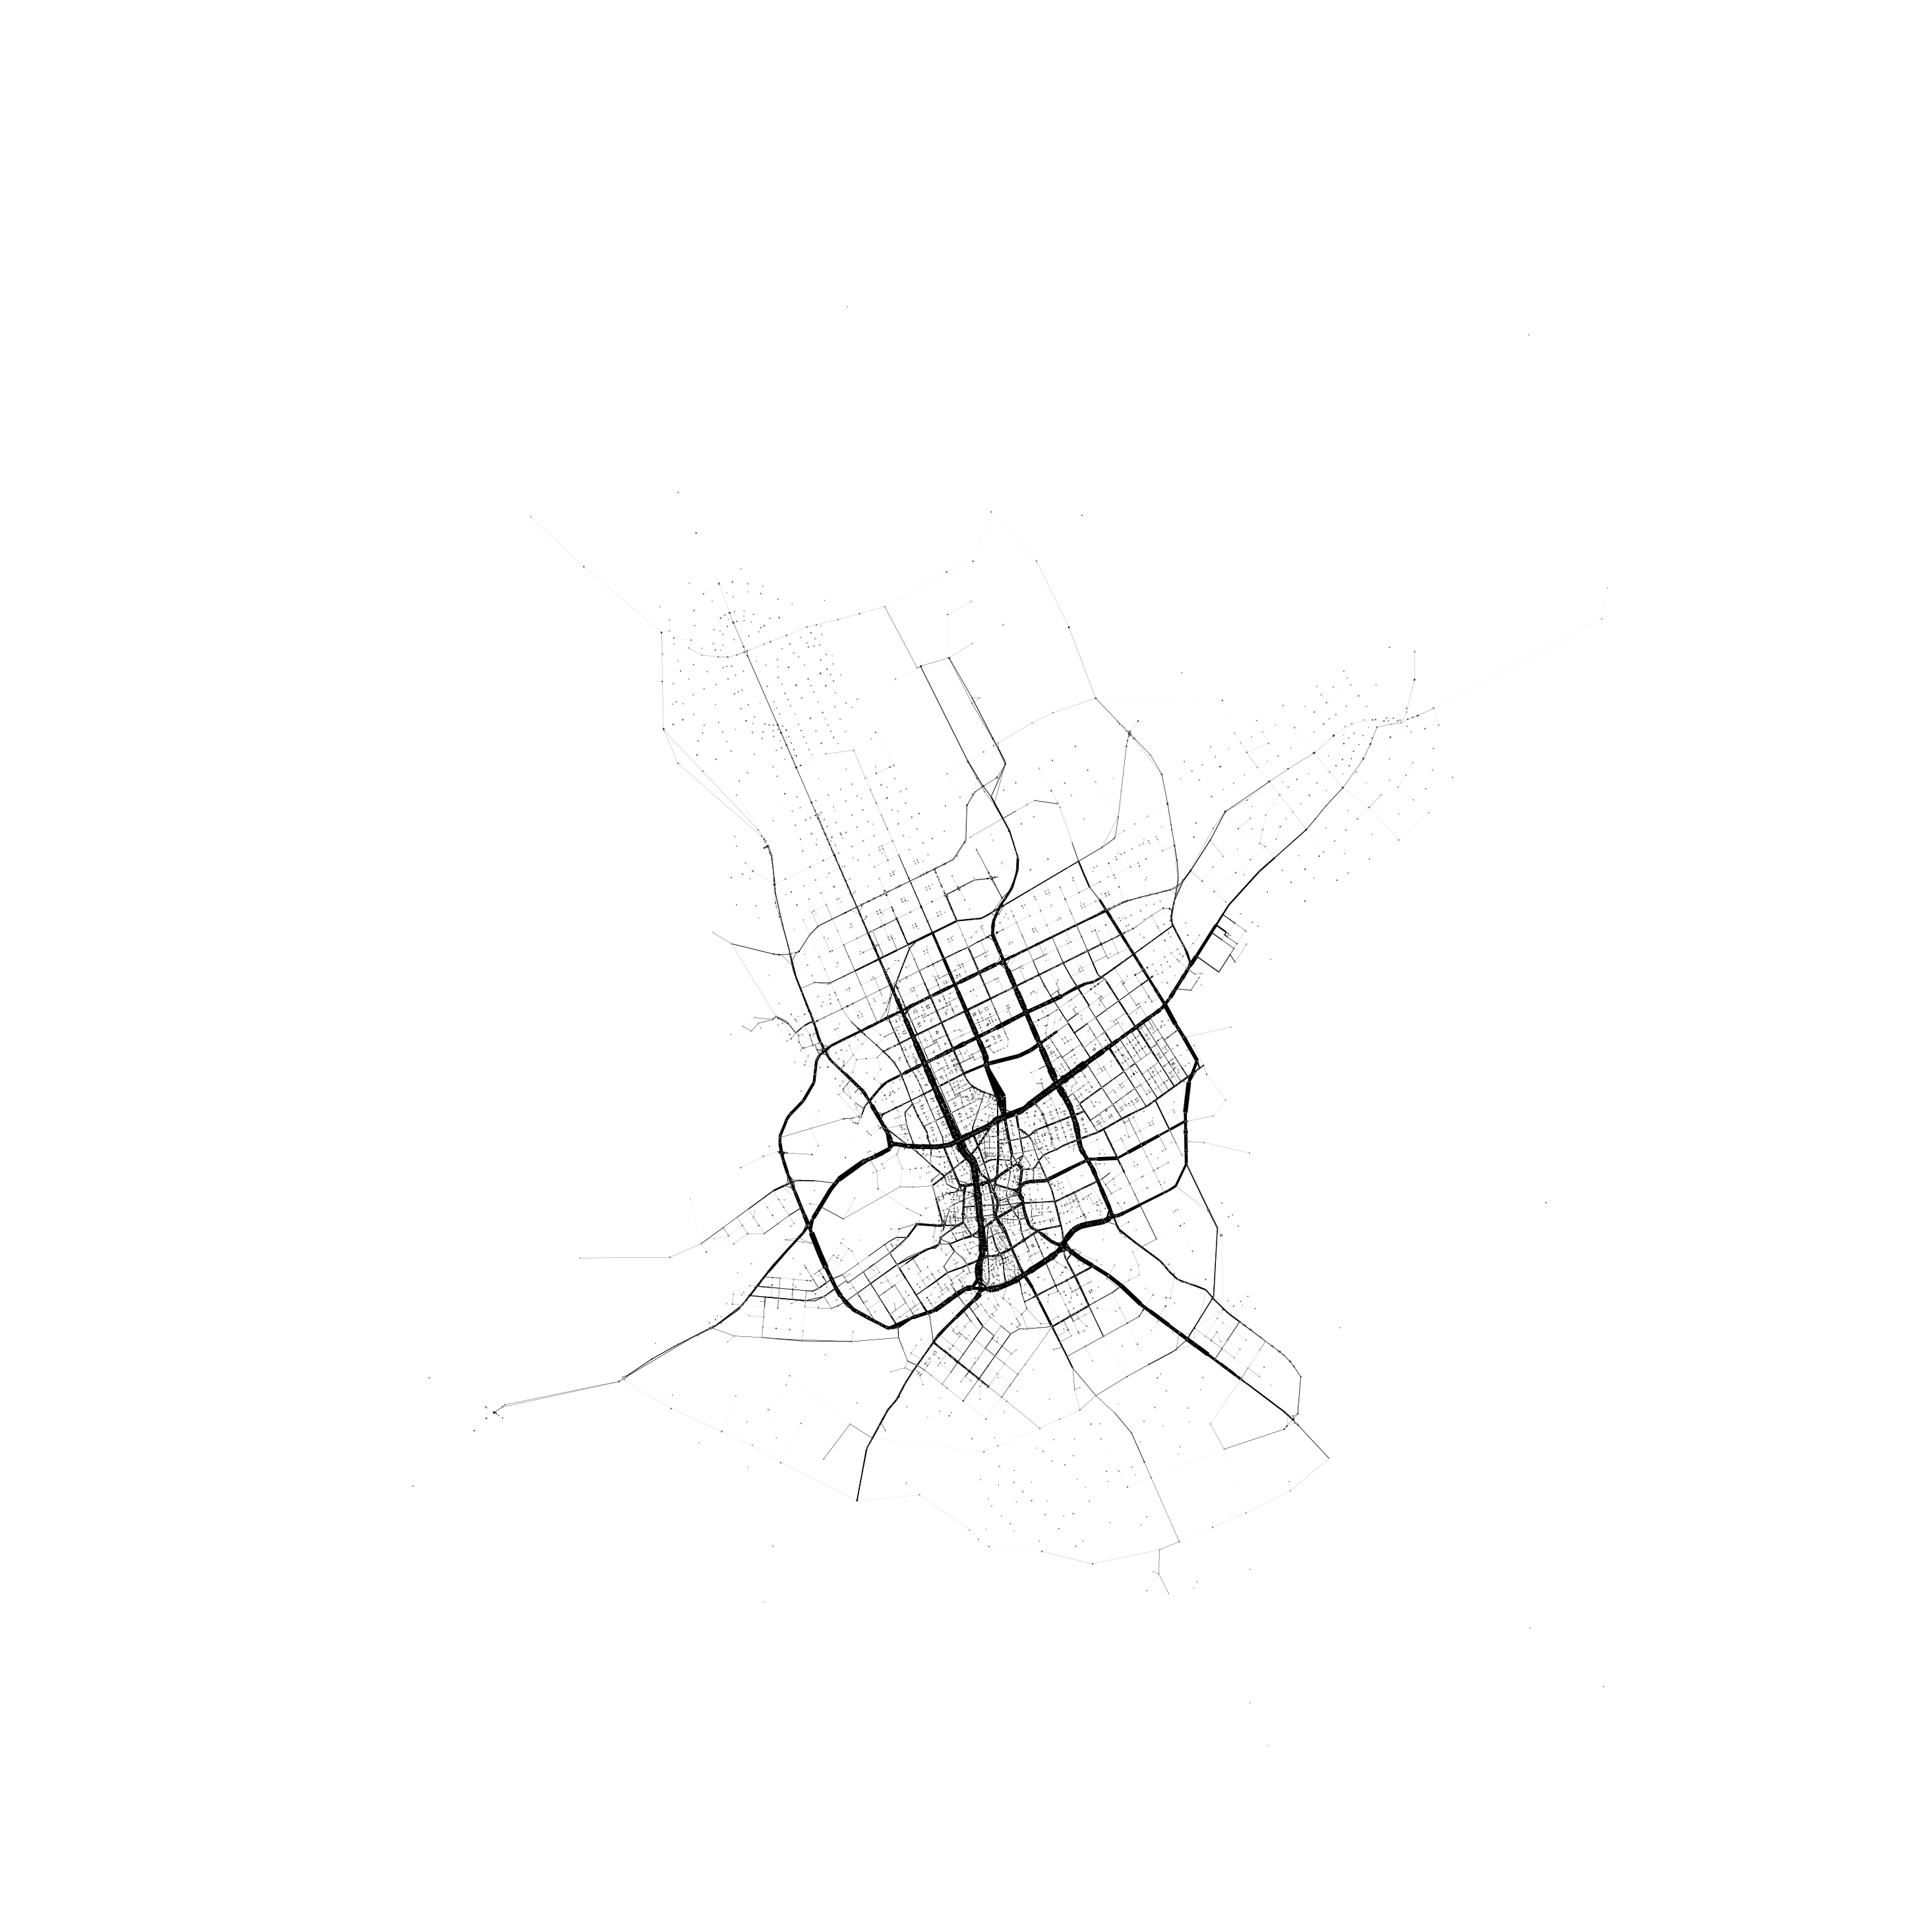

In [51]:
plt.figure(figsize=(40,40))

node_sizes = []
for i in RG.nodes():
    node_sizes.append(degrees[i])

node_colors = range(len(RG.nodes()))
edges = RG.edges()
weights = [RG[u][v]["volume"]*0.0009 for u,v in edges]
edge_colors = [RG[u][v]["travel_time"] for u,v in edges]

node_colors = range(len(RG.nodes()))
nx.draw(RG, pos=loc_dict, node_size=node_centrality, width=weights, node_color=node_colors);
##nx.draw_networkx_labels(RG, pos=loc_dict); # semicolon suppresses output

In [26]:
# If I pick any two intersections, is it possible to find a route
# between them? Check if the network is connected.
print "*Is the road network connected? "+ str(nx.is_connected(RG))

*Is the road network connected? True


In [27]:
import json
node_list = [1]
for start in node_list:
    print "*1. Start Node: " + str(start) 
    path_dict = {start:[]}
    for end in RG.nodes()[:3]:
        try:
            short_path = nx.dijkstra_path(RG, start, end, weight='travel_time')
            path_dict[start].append({end:short_path})
            print "*1.1 [start, End]: " + str([start, end])
            print "*1.2 Shortest path is: "+str(short_path)
            print "*1.3 Record dictionary is: "+str(path_dict)
        except:
            pass
    ##print path_dict
    with open("Json/"+str(start)+".txt", "w") as text_file:
        text_file.write(json.dumps(path_dict))
        print "Done writting with Start Node: " + str(start) + "\n"

*1. Start Node: 1
*1.1 [start, End]: [1, 1]
*1.2 Shortest path is: [1]
*1.3 Record dictionary is: {1: [{1: [1]}]}
*1.1 [start, End]: [1, 2]
*1.2 Shortest path is: [1, 2]
*1.3 Record dictionary is: {1: [{1: [1]}, {2: [1, 2]}]}
*1.1 [start, End]: [1, 3]
*1.2 Shortest path is: [1, 9437, 120, 4126, 712, 3281, 2694, 2695, 4387, 7854, 8989, 7255, 5924, 7188, 8325, 5462, 5463, 6004, 6003, 4651, 6250, 9698, 10407, 7153, 4966, 1895, 3007, 10539, 2846, 2845, 4724, 4723, 7519, 7518, 461, 460, 130, 129, 4055, 4054, 8922, 7396, 7395, 831, 1618, 8189, 9847, 10034, 7564, 5046, 7012, 8713, 511, 6364, 5850, 916, 2867, 724, 725, 8343, 10727, 5333, 6343, 6083, 5250, 3129, 5732, 2056, 10279, 10616, 3]
*1.3 Record dictionary is: {1: [{1: [1]}, {2: [1, 2]}, {3: [1, 9437, 120, 4126, 712, 3281, 2694, 2695, 4387, 7854, 8989, 7255, 5924, 7188, 8325, 5462, 5463, 6004, 6003, 4651, 6250, 9698, 10407, 7153, 4966, 1895, 3007, 10539, 2846, 2845, 4724, 4723, 7519, 7518, 461, 460, 130, 129, 4055, 4054, 8922, 7396, 7395

In [28]:
o=1
d=3
path_all_id= path_dict[1][2][3]
print path_all_id

# Learning a new function "subgraph"
# Shortest_RG = RG.subgraph(path_all_id)
##print Shortest_RG[1][9437]
##print "\n"
##print Shortest_RG.edges()
##print "\n"
##print Shortest_RG.node[1]
##print "\n"
# Caculate the degrees of each node
##degrees = []
##degrees = nx.degree(Shortest_RG)
##print degrees

[1, 9437, 120, 4126, 712, 3281, 2694, 2695, 4387, 7854, 8989, 7255, 5924, 7188, 8325, 5462, 5463, 6004, 6003, 4651, 6250, 9698, 10407, 7153, 4966, 1895, 3007, 10539, 2846, 2845, 4724, 4723, 7519, 7518, 461, 460, 130, 129, 4055, 4054, 8922, 7396, 7395, 831, 1618, 8189, 9847, 10034, 7564, 5046, 7012, 8713, 511, 6364, 5850, 916, 2867, 724, 725, 8343, 10727, 5333, 6343, 6083, 5250, 3129, 5732, 2056, 10279, 10616, 3]


In [29]:
# Let's define a new empty undirected graph "Shortest_RG".
Shortest_RG = nx.Graph()
weights_list = []
time_list = []
sum_time = {}
for i in range(len(path_all_id)-1):
    o_id = path_all_id[i]
    d_id = path_all_id[i+1]
    ##print o_id, d_id    
    weights_list.append(round(RG[o_id][d_id]["volume"],2))
    time_list.append(round(RG[o_id][d_id]["travel_time"],2))
    ##print weights_list
    ##print time_list
    new_edge_attr = RG[o_id][d_id]
    ##print new_edge_attr
    Shortest_RG.add_edge(*(o_id,d_id), attr_dict= new_edge_attr)
    Shortest_RG[o_id][d_id]["sum_time"]= round(sum(time_list),2)
    sum_time[(o_id,d_id)] = round(sum(time_list),2)
##print weights_list
##print time_list
    
loc_dict = {}
for node_index in Shortest_RG.nodes():
    ##print node_index
    loc_dict[node_index] = RG.node[node_index]["coordinate"]
    ##print loc_dict[node_index]

print Shortest_RG.edges()
print "\n"
print sum_time
print "\n"
print loc_dict
print "\n"
print Shortest_RG.edge[1][9437]

[(1, 9437), (130, 129), (130, 460), (10539, 2846), (10539, 3007), (8325, 7188), (8325, 5462), (2694, 3281), (2694, 2695), (2695, 4387), (2056, 5732), (2056, 10279), (8713, 7012), (8713, 511), (7255, 5924), (7255, 8989), (7564, 10034), (7564, 5046), (5250, 3129), (5250, 6083), (3, 10616), (7188, 5924), (3129, 5732), (8343, 725), (8343, 10727), (4054, 8922), (4054, 4055), (8989, 7854), (4126, 120), (4126, 712), (5333, 6343), (5333, 10727), (4387, 7854), (10407, 7153), (10407, 9698), (129, 4055), (4651, 6250), (4651, 6003), (2845, 4724), (2845, 2846), (10034, 9847), (4723, 4724), (4723, 7519), (3007, 1895), (2867, 724), (2867, 916), (6083, 6343), (5046, 7012), (712, 3281), (460, 461), (461, 7518), (1618, 8189), (1618, 831), (724, 725), (5462, 5463), (5463, 6004), (8922, 7396), (6364, 5850), (6364, 511), (9437, 120), (7518, 7519), (10616, 10279), (9698, 6250), (7395, 7396), (7395, 831), (4966, 7153), (4966, 1895), (5850, 916), (6003, 6004), (9847, 8189)]


{(511, 6364): 19.66, (3007, 10539

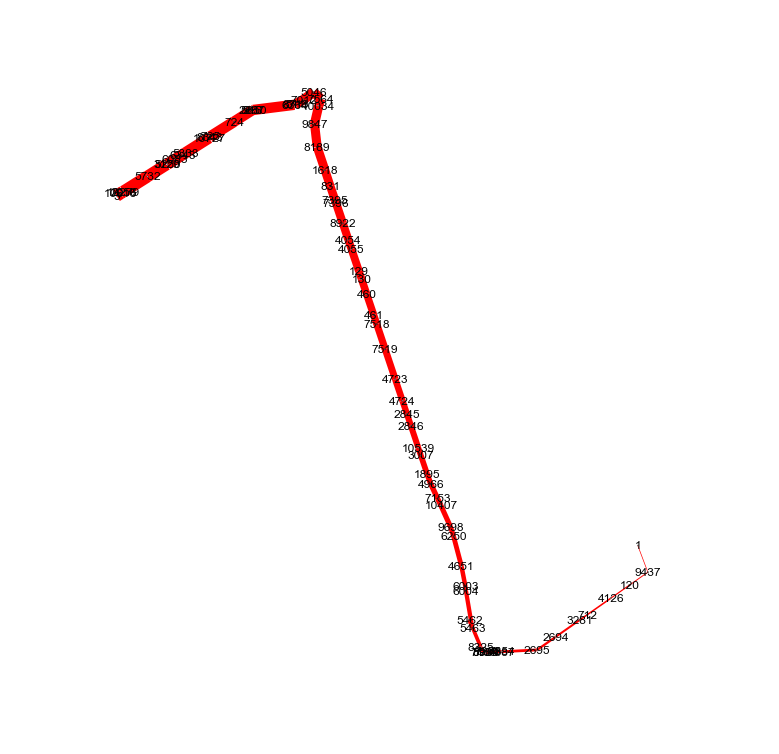

In [34]:
# ****Right way to call edge, node attributes as visualization reference****
# colors = [G[u][v]['color'] for u,v in edges]
# weights = [G[u][v]['weight'] for u,v in edges]
# nx.draw(G, pos, edges=edges, edge_color=colors, width=weights)

degrees = nx.degree(Shortest_RG)
node_sizes = []
for i in Shortest_RG.nodes():
    node_sizes.append(degrees[i])

node_colors = range(len(Shortest_RG.nodes()))

edges = Shortest_RG.edges()
weights = [Shortest_RG[u][v]["sum_time"]*0.5 for u,v in edges]
edge_colors = [Shortest_RG[u][v]["volume"] for u,v in edges]

##print node_sizes
##print node_colors
##print edges
##print weights
##print edge_colors

plt.figure(figsize=(10,10))

nx.draw(Shortest_RG, pos=loc_dict, node_size=node_sizes, node_color=node_colors, width=weights, edge_color="red");
nx.draw_networkx_labels(Shortest_RG,pos=loc_dict); # semicolon suppresses output

In [41]:
sum_time = [Shortest_RG[u][v]["sum_time"] for u,v in edges]
print sorted(sum_time)

[1.35, 1.88, 2.41, 3.1, 3.32, 4.05, 4.58, 5.56, 5.58, 5.97, 6.05, 6.27, 6.37, 6.62, 7.44, 7.75, 8.5, 8.59, 8.98, 9.59, 9.81, 10.31, 10.48, 10.81, 11.02, 11.43, 11.61, 12.07, 12.33, 12.61, 13.05, 13.66, 14.17, 14.36, 14.77, 15.08, 15.24, 15.69, 15.88, 16.21, 16.63, 16.69, 16.97, 17.29, 17.76, 18.19, 18.54, 18.68, 19.12, 19.41, 19.63, 19.64, 19.66, 20.71, 20.72, 20.73, 21.24, 21.89, 21.91, 21.93, 22.58, 22.67, 22.88, 23.09, 23.11, 23.64, 24.31, 24.33, 24.4, 24.51]


In [ ]:
# Import json, Read riyadh network node data to get st_x, st_y (Lng, Lat)
import json
Nodes = pd.read_csv("data/riyadh_nodes.txt", sep=" ") ## <nrows> define the total rows that are read
print "* Total Nodes Numbers read is: " + str(len(Nodes)) + "\n"
Nodes.head(3)

In [ ]:
# Now construct the multi-tier dictionary structures.
# Build the 1st tier dictionary, called \"geoDataSet\".\n",
geoDataSet  = {}
geoDataSet["type"] = "FeatureCollection"
geoDataSet["features"] = []

# Build a dictionary "Coordinate" {id:[st_x,st_y]} that join node id with st_x and st_y. 
Coordinate = {}
for i in range(len(Nodes["id"])):  # i =0,1,2,...    
    idx = Nodes["id"][i]           # idx = 1,2,3,... In fact 'idx' is 'id' in dataframe "Nodes"
    Coordinate[idx]=[Nodes["st_x"][i],Nodes["st_y"][i]]

print "Length of dict 'Coordinate': " + str(len(Coordinate)) ## Test Print
print Coordinate[50]  ## Test Print"

In [ ]:
for i in range(len(Coordinate)):         # i =0,1,2,...,    
    id_o = Nodes["id"][i]                  # idx = 1,2,3,... In fact 'idx' is 'id' of dataframe "Nodes"
    print "1* When i= "+str(i)+ ", Orientation Node= "+str(id_o)
    steps = len(paths[id_o].keys())  # Count how many successful lines connected to a node, including itself
    if steps >1:
        print "2* All Paths to Ori_node are "+str(paths[id_o])  # when idx=1, len(paths[idx])=3
        ###print len(paths[idx].keys())       # when idx=1, len(path[idx].keys())=3
        destination = [] # Define a list "destination" [] that use to record all the destinations
        #print paths[idx]
        #print Coordinate[idx]

        ## Get all the nodes id that connect with node i.
        for key in paths[id_o]: # when idx=1,paths[1]={1:[1],2:[1, 2],5748:[1, 5748]}, key=1,then 2,then 5748       
            destination.append(key)               
        print "3* Total destination is"+ str(destination)+"\n"

        for index in range(steps):        
            id_des = destination[index]
            print "4.1** When index= " + str(index)+"， Destination Node= " + str(id_des)
            tmp_dict = {}
            tmp_dict["type"] = "Feature"
            tmp_dict["geometry"] = {}
            tmp_dict["geometry"]["type"] = "LineString"
            tmp_dict["geometry"]["coordinates"] = []        
            tmp_coor=[Coordinate[id_o]] ## Already insert one origin point to avoid single point situation
            ##print "4.2** O_Node_"+str(id_des) +"'s coordination is"+ str(Coordinate[id_o])     
            for x in paths[id_o][id_des]:           
                tmp_coor.append(Coordinate[x])            
            ##print "4.3** Temporary Destination List=" + str(tmp_coor)        
            tmp_dict["geometry"]["coordinates"].append(tmp_coor)
            ##print "4.4** tmp_dict are: "+str(tmp_dict)+"\n"      
            geoDataSet["features"].append(tmp_dict)

        ##print "4*" + str(geoDataSet)+ "\n"

In [ ]:
print nx.single_source_shortest_path(RG, 1, cutoff=50)

import json
node_list = [1,2,50,90]
for start in RG.nodes()[:1000]:
    short_path = nx.single_source_shortest_path(RG, start, cutoff=50)
    with open("Json/cutoff/"+str(start)+".txt", "w") as text_file:
        text_file.write(json.dumps(path_dict))

In [ ]:
# Import json, Read riyadh network node data to get st_x, st_y (Lng, Lat)
import json
Nodes = pd.read_csv("data/riyadh_nodes.txt", sep=" ") ## <nrows> define the total rows that are read
print "* Total Nodes Numbers read is: " + str(len(Nodes)) + "\n"
Nodes.head(3)

In [ ]:
# Now construct the multi-tier dictionary structures.
# Build the 1st tier dictionary, called \"geoDataSet\".\n",
geoDataSet  = {}
geoDataSet["type"] = "FeatureCollection"
geoDataSet["features"] = []

# Build a dictionary "Coordinate" {id:[st_x,st_y]} that join node id with st_x and st_y. 
Coordinate = {}
for i in range(len(Nodes["id"])):  # i =0,1,2,...    
    idx = Nodes["id"][i]           # idx = 1,2,3,... In fact 'idx' is 'id' in dataframe "Nodes"
    Coordinate[idx]=[Nodes["st_x"][i],Nodes["st_y"][i]]

print "Length of dict 'Coordinate': " + str(len(Coordinate)) ## Test Print
print Coordinate[50]  ## Test Print"

In [ ]:
for i in range(len(Coordinate)):         # i =0,1,2,...,    
    id_o = Nodes["id"][i]                  # idx = 1,2,3,... In fact 'idx' is 'id' of dataframe "Nodes"
    print "1* When i= "+str(i)+ ", Orientation Node= "+str(id_o)
    steps = len(paths[id_o].keys())  # Count how many successful lines connected to a node, including itself
    if steps >1:
        print "2* All Paths to Ori_node are "+str(paths[id_o])  # when idx=1, len(paths[idx])=3
        ###print len(paths[idx].keys())       # when idx=1, len(path[idx].keys())=3
        destination = [] # Define a list "destination" [] that use to record all the destinations
        #print paths[idx]
        #print Coordinate[idx]

        ## Get all the nodes id that connect with node i.
        for key in paths[id_o]: # when idx=1,paths[1]={1:[1],2:[1, 2],5748:[1, 5748]}, key=1,then 2,then 5748       
            destination.append(key)               
        print "3* Total destination is"+ str(destination)+"\n"

        for index in range(steps):        
            id_des = destination[index]
            print "4.1** When index= " + str(index)+"， Destination Node= " + str(id_des)
            tmp_dict = {}
            tmp_dict["type"] = "Feature"
            tmp_dict["geometry"] = {}
            tmp_dict["geometry"]["type"] = "LineString"
            tmp_dict["geometry"]["coordinates"] = []        
            tmp_coor=[Coordinate[id_o]] ## Already insert one origin point to avoid single point situation
            ##print "4.2** O_Node_"+str(id_des) +"'s coordination is"+ str(Coordinate[id_o])     
            for x in paths[id_o][id_des]:           
                tmp_coor.append(Coordinate[x])            
            ##print "4.3** Temporary Destination List=" + str(tmp_coor)        
            tmp_dict["geometry"]["coordinates"].append(tmp_coor)
            ##print "4.4** tmp_dict are: "+str(tmp_dict)+"\n"      
            geoDataSet["features"].append(tmp_dict)

        ##print "4*" + str(geoDataSet)+ "\n"

In [ ]:
json.dumps(geoDataSet)